In [1]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.ndimage import grey_opening

In [2]:
import scipy.ndimage as nd

def fill(data, invalid=None):
    """
    Replace the value of invalid 'data' cells (indicated by 'invalid') 
    by the value of the nearest valid data cell

    Input:
        data:    numpy array of any dimension
        invalid: a binary array of same shape as 'data'. True cells set where data
                 value should be replaced.
                 If None (default), use: invalid  = np.isnan(data)

    Output: 
        Return a filled array. 
    """
    #import numpy as np
    #import scipy.ndimage as nd

    if invalid is None: invalid = np.isnan(data)

    ind = nd.distance_transform_edt(invalid, return_distances=False, return_indices=True)
    return data[tuple(ind)]


In [8]:
images = glob.glob("/scratch/bern/elferich/deco_lace_manuscript_processing/views/???_lamella[1234].tif")
for image_fn in images:
    image = imread(image_fn)
    bright_mask = image > 28
    dark_mask = image < 0.2
    #plt.imshow(bright_mask,cmap='gray')
    #plt.title(image_fn[-15:])
    #plt.show()
    #plt.imshow(dark_mask,cmap='gray')
    #plt.title(image_fn[-15:])
    #plt.show()
    mask = np.invert(bright_mask | dark_mask)
    masked_image = fill(image,np.invert(mask))
    #plt.imshow(masked_image,cmap='gray')
    #plt.title(image_fn[-15:])
    #plt.show()
    opened_image = grey_opening(masked_image, size=50)
    imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/views/{image_fn[-16:-4]}_tophat.tif',image-nd.gaussian_filter(opened_image,20)+10)
    imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/views/{image_fn[-16:-4]}_opened.tif',nd.gaussian_filter(opened_image,20))

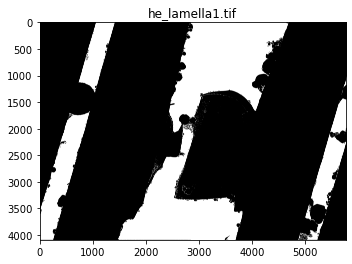

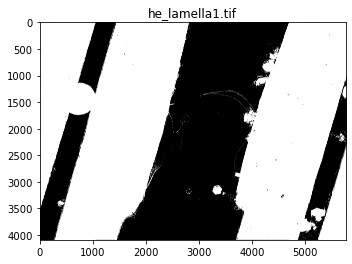

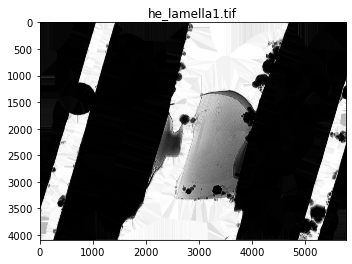

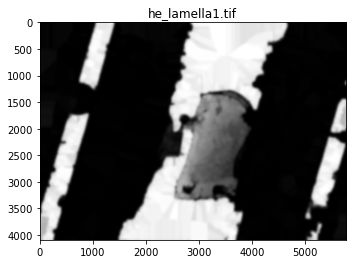

In [18]:
images = glob.glob("/scratch/bern/elferich/deco_lace_manuscript_processing/views/the_lamella[1234].tif")
for image_fn in images:
    image = np.int16(imread(image_fn))
    bright_mask = image > 5000
    dark_mask = image < 800
    plt.imshow(bright_mask,cmap='gray')
    plt.title(image_fn[-15:])
    plt.show()
    plt.imshow(dark_mask,cmap='gray')
    plt.title(image_fn[-15:])
    plt.show()
    mask = np.invert(bright_mask | dark_mask)
    masked_image = fill(image,np.invert(mask))
    plt.imshow(masked_image,cmap='gray')
    plt.title(image_fn[-15:])
    plt.show()
    opened_image = grey_opening(masked_image, size=50)
    plt.imshow(nd.gaussian_filter(opened_image,20),cmap='gray')
    plt.title(image_fn[-15:])
    plt.show()
    imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/views/{image_fn[-16:-4]}_tophat.tif',image-nd.gaussian_filter(opened_image,20)+10)
    imsave(f'/scratch/bern/elferich/deco_lace_manuscript_processing/views/{image_fn[-16:-4]}_opened.tif',nd.gaussian_filter(opened_image,20))